# Emotify: Your Emotions, Your Soundtrack

In [1]:
import pandas as pd
import numpy as np
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score



In [2]:
# Specify paths to your folders
train_path = 'D:/Project/train'
test_path = 'D:/Project/test'

In [3]:
# Image preprocessing parameters
batch_size = 64
img_width, img_height = 48, 48 
target_size = (img_width, img_height)

In [4]:
# Create ImageDataGenerators for data augmentation and flow from directories
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)  # Only normalization for test set

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=target_size,
    batch_size=batch_size,
    color_mode='grayscale',  # Grayscale for FER2013
    class_mode='categorical',
    classes=['angry', 'happy', 'neutral', 'sad']
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=target_size,
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical',
    classes=['angry', 'happy', 'neutral', 'sad']
)

Found 21005 images belonging to 4 classes.
Found 5212 images belonging to 4 classes.


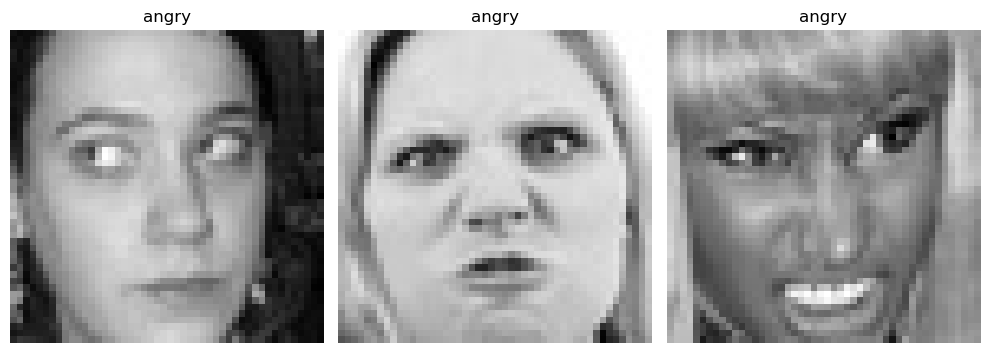

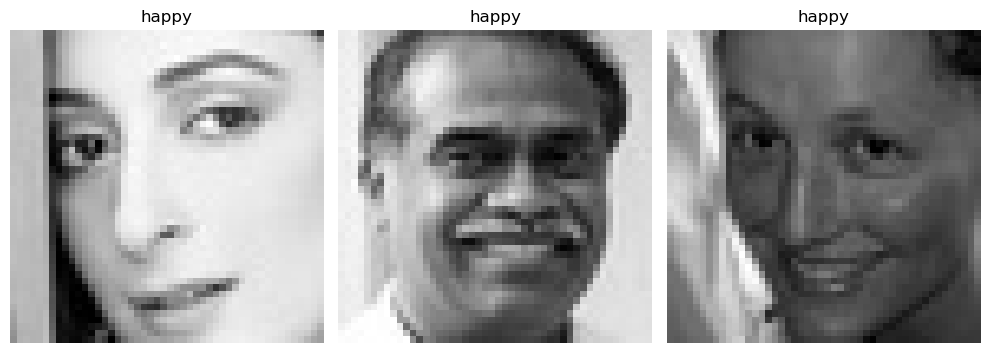

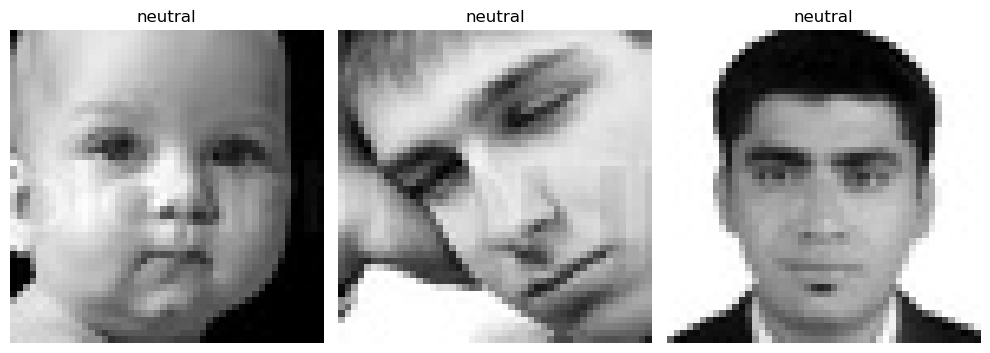

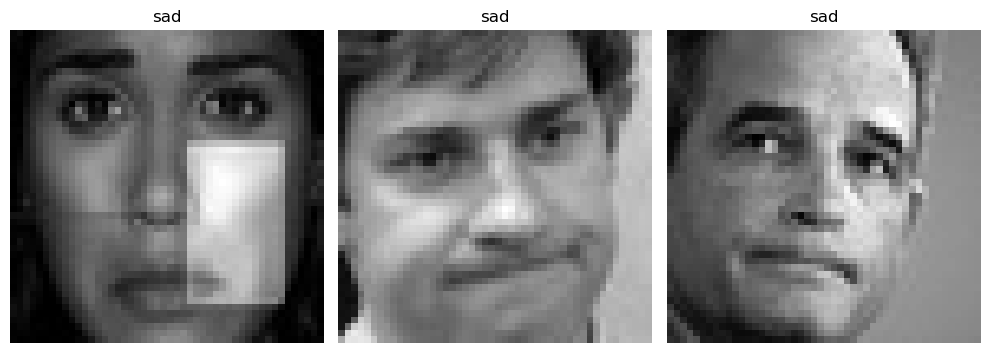

In [5]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 

dataset_path = 'D:/Project/train'
emotion_classes = ['angry', 'happy', 'neutral', 'sad']

def display_grid_of_images(image_paths, labels, rows, cols):
    """Displays a grid of images"""
    fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(10, 8))
    axes = axes.flatten()

    for img_path, label, ax in zip(image_paths, labels, axes):
        img = mpimg.imread(img_path)
        ax.imshow(img, cmap='gray')
        ax.set_title(label)
        ax.axis('off')

    plt.tight_layout()
    plt.show()

for emotion in emotion_classes:
    emotion_dir = os.path.join(dataset_path, emotion)
    image_files = os.listdir(emotion_dir)

    image_paths = [os.path.join(emotion_dir, img) for img in image_files[-3:]]
    labels = [emotion] * 3  

    display_grid_of_images(image_paths, labels, rows=1, cols=3) 


In [6]:
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(48, 48, 1)),
   
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
   
    MaxPooling2D((2, 2)),

    Conv2D(256, (3, 3), activation='relu'),
   
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(1024, activation='relu'),
    BatchNormalization(),
    Dropout(0.5), 
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    
    Dense(4, activation='softmax')  # 4 classes for emotions
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 23, 23, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 10, 10, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 256)         295168    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 4, 4, 256)         0

In [ ]:
callbacks = [
    EarlyStopping(patience=10, restore_best_weights=True, monitor='val_accuracy'),
    ReduceLROnPlateau(factor=0.5, patience=5)
]

history = model.fit(
    train_generator,
    epochs=5,
    validation_data=test_generator,
    callbacks=callbacks
)

Epoch 1/5
329/329 [==============================] - 56s 169ms/step - loss: 0.7055 - accuracy: 0.7151 - val_loss: 0.7264 - val_accuracy: 0.7049 - lr: 2.5000e-04
Epoch 2/5
329/329 [==============================] - 52s 158ms/step - loss: 0.6989 - accuracy: 0.7184 - val_loss: 0.7312 - val_accuracy: 0.7017 - lr: 2.5000e-04
Epoch 3/5
220/329 [===================>..........] - ETA: 16s - loss: 0.7042 - accuracy: 0.7182

In [9]:
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_pred_classes

82/82 [==============================] - 3s 35ms/step


array([1, 1, 2, ..., 3, 2, 1], dtype=int64)

In [10]:
loss,accuracy=model.evaluate(test_generator)

82/82 [==============================] - 3s 34ms/step - loss: 1.0546 - accuracy: 0.5581


In [11]:
model.save('my_model') # SavedModel includes everything for easy deployment

INFO:tensorflow:Assets written to: my_model\assets


INFO:tensorflow:Assets written to: my_model\assets


In [12]:
# from keras.models import load_model
# model = load_model('my_emotion_model.h5')

In [13]:
# !pip install cv

In [14]:
# import cv2
# from tensorflow.keras.models import load_model
# import numpy as np
# import time

# # Load your Emotion Detection Model
# emotion_model = load_model("my_emotion_model") 

# # Define emotion labels (make sure they match what you trained on)
# emotion_labels = ['angry', 'happy', 'neutral', 'sad']

# # Start the webcam capture
# video_capture = cv2.VideoCapture(0)
# start_time = time.time()
# detected_emotion = None


# while True:
#     # Capture frame-by-frame
#     ret, frame = video_capture.read()

#     # Preprocessing
#     gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

#     # Face detection (choose between OpenCV's default)
    
#     ## 1. OpenCV's Haar Cascade:
#     face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
#     faces = face_cascade.detectMultiScale(gray, 1.3, 5)
 

#     for (x, y, w, h) in faces:
#         # Extract region of interest (face)
#         roi_gray = gray[y:y+h, x:x+w] 
#         roi_gray = cv2.resize(roi_gray, (48, 48), interpolation=cv2.INTER_AREA)  # Assuming your model works with 48x48 images

#         # Only predict if a face is detected
#         if np.sum([roi_gray]) != 0:
#             roi = roi_gray.astype('float') / 255.0
#             roi = np.expand_dims(roi, axis=0)  # Add a batch dimension

#             # Make a prediction
#             prediction = emotion_model.predict(roi)[0]
#             label = emotion_labels[prediction.argmax()]

#             # Draw a rectangle and display emotion
#             cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2) 
#             cv2.putText(frame, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)
            
#             # Capture image
#             cv2.imwrite("captured_image.jpg", frame)
#             print("Detected Emotion:", label)
#             break  # Exit loop after capturing

#     cv2.imshow('Emotion Detection', frame)
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break

# # Release resources
# video_capture.release()
# cv2.destroyAllWindows()
